## Case study on Regression


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making.

In [2]:
# read the csv file containing second hand i10 car data

df = pd.read_csv("car_age_price.csv")

In [3]:
# display the top 5 rows of dataset

df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


The dataframe contains the Year of making and Price of the car as columns.

In [4]:
df.shape

(112, 2)

### Find the best linear relationship between year and price.

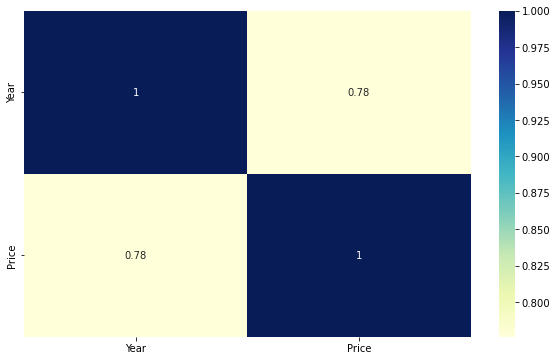

In [5]:
# find the correlation coefficient and plot it using heatmap

corrmatrix = df.corr()
plt.subplots(figsize=(10,6))
sns.heatmap(corrmatrix, annot=True , cmap="YlGnBu")
plt.show()


The correlation coefficient value is 0.78 for year vs price. It shows that there is a strong positive correlation between them.

In [6]:
# separate the dependent/target(price) and independent(year) values

X = df.drop(['Price'], axis=1)
y = df['Price']

In [7]:
# split the data into training and testing
# import train_test_split from sklearn

from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### Linear Regression model

In [8]:
#import Linear Regression from sklearn

from sklearn.linear_model import LinearRegression


In [9]:
# create a linear regression model
lr = LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

In [10]:
#print the predictions and test values
print("The test values are:\n",y_test)
print("The prediction values are :\n", predictions)

The test values are:
 40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64
The prediction values are :
 [600775.91252081 505558.77690466 553167.34471273 553167.34471273
 553167.34471273 410341.6412885  505558.77690466 553167.34471273
 600775.91252081 600775.91252081 315124.50567235 505558.77690466
 410341.6412885  648384.48032889 553167.34471273 600775.91252081
 315124.50567235 410341.6412885  505558.77690466 505558.77690466
 505558.77690466 505558.77690466 505558.77690466]


In [11]:
#evaluate the model by finding mean squared error and r squared value

from sklearn.metrics import mean_squared_error,r2_score
print("The mean squared error is :",mean_squared_error(y_test,predictions))
print("R squared value is:", r2_score(y_test,predictions))


The mean squared error is : 4326906256.829671
R squared value is: 0.36759313425902185


In this case, the error mean squared error is very high and the goodness of fit is low.

In [12]:
# calculate linear regression again by changing the test size to 0.25

X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)



In [13]:
# create a linear regression model

lr1 = LinearRegression()
model1 = lr1.fit(X_train,y_train)
predictions1 = model1.predict(X_test)

In [14]:
#print the predictions and test values
print("The test values are:\n",y_test)
print("The prediction values are :\n", predictions1)

The test values are:
 40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
66     525000
90     520000
62     540000
22     434999
85     320000
Name: Price, dtype: int64
The prediction values are :
 [599223.07304104 505265.04214995 552244.05759549 552244.05759549
 552244.05759549 411307.01125886 505265.04214995 552244.05759549
 599223.07304104 599223.07304104 317348.98036776 505265.04214995
 411307.01125886 646202.08848657 552244.05759549 599223.07304104
 317348.98036776 411307.01125886 505265.04214995 505265.04214995
 505265.04214995 505265.04214995 505265.04214995 505265.04214995
 505265.04214995 505265.04214995 411307.01125886 411307.01125886]


In [15]:
#evaluate the model by finding mean squared error and r squared value
print("The mean squared error is :",mean_squared_error(y_test,predictions1))
print("R squared value is:", r2_score(y_test,predictions1))

The mean squared error is : 3878767151.073449
R squared value is: 0.4347961632108023


The mean squared error and R squared value slightly reduced when the test size was changed to 0.25. Thus model1 forms the best linear relationship between year and price. 

### Predict the possible price of a 2022 model second-hand grand i10?

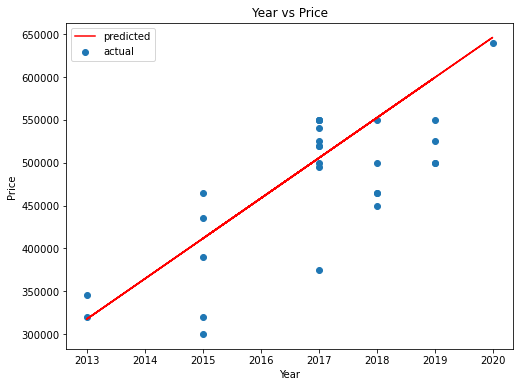

In [16]:
# visualize X_test, y_test and predictions1 using scatter plot
plt.figure(figsize=(8,6))
plt.scatter(X_test , y_test, label="actual")
plt.plot(X_test,predictions1 , c = "r", label="predicted")
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()

In [17]:
# create a new array with the year 2022
new_pred = np.array(2022).reshape(-1,1)
new_pred

array([[2022]])

In [19]:
# input the new array to the model1
y_pred = model1.predict(new_pred)
print("The predicted price of i10 for the year 2022 is :",  y_pred[0])

The predicted price of i10 for the year 2022 is : 740160.1193776578


### Lasso Regression model

In [20]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [21]:
# import Lasso from sklearn library
from sklearn.linear_model import Lasso

# create Lasso Regression model

lasso = Lasso(alpha=1)
model2 = lasso.fit(X_train,y_train)
y_predlasso = model2.predict(X_test)

In [22]:
#print the predictions and test values
print("The test values are:\n",y_test)
print("The prediction values are :\n", y_predlasso)

The test values are:
 40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
66     525000
90     520000
62     540000
22     434999
85     320000
Name: Price, dtype: int64
The prediction values are :
 [599222.10828854 505264.87581331 552243.49205092 552243.49205092
 552243.49205092 411307.64333805 505264.87581331 552243.49205092
 599222.10828854 599222.10828854 317350.4108628  505264.87581331
 411307.64333805 646200.72452617 552243.49205092 599222.10828854
 317350.4108628  411307.64333805 505264.87581331 505264.87581331
 505264.87581331 505264.87581331 505264.87581331 505264.87581331
 505264.87581331 505264.87581331 411307.64333805 411307.64333805]


In [23]:
#evaluate the model by finding mean squared error and r squared value
print("The mean squared error is :",mean_squared_error(y_test,y_predlasso))
print("R squared value is:", r2_score(y_test,y_predlasso))

The mean squared error is : 3878735896.222091
R squared value is: 0.4348007175862566


There is only slight variation when using Lasso model. However, the mean squared error has reduced in Lasso Regression compared to linear Regression.

In [24]:
#try Lasso Regression with alpha = 10

lasso1 = Lasso(alpha=10)
model3 = lasso1.fit(X_train,y_train)
y_predlasso1 = model3.predict(X_test)

In [103]:
#print the predictions and test values

print("The test values are:\n",y_test)
print("The prediction values are :\n", y_predlasso1)

The test values are:
 40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
66     525000
90     520000
62     540000
22     434999
85     320000
Name: Price, dtype: int64
The prediction values are :
 [599213.42551628 505263.3787836  552238.40214995 552238.40214995
 552238.40214995 411313.33205093 505263.3787836  552238.40214995
 599213.42551628 599213.42551628 317363.28531826 505263.3787836
 411313.33205093 646188.44888261 552238.40214995 599213.42551628
 317363.28531826 411313.33205093 505263.3787836  505263.3787836
 505263.3787836  505263.3787836  505263.3787836  505263.3787836
 505263.3787836  505263.3787836  411313.33205093 411313.33205093]


In [25]:
#evaluate the model by finding mean squared error and r squared value
print("The mean squared error is :",mean_squared_error(y_test,y_predlasso1))
print("R squared value is:", r2_score(y_test,y_predlasso1))

The mean squared error is : 3878454646.2104197
R squared value is: 0.43484170060470095


The mean squared error lowered further after increasing the alpha value (regularization).So lasso model is performing slightly better for car_age_price dataset compared to Linear Regression model.